In [43]:
# Import libraries:
import numpy as np
from matplotlib import pyplot as plt

# RF period (325 MHz frequency):
T = 1/(325*10**6)*10**9 # ns

# Length of period:
len_period = 4.2 # m

# Directory:
dir = 'not-flipped/'
# dir = 'flipped/'

# Load data from output txt file:
data = np.loadtxt(dir+'AllTracks.txt')

# ID of event to consider:
eventID = 2

In [44]:
# Values along channel:
x_vals = []; y_vals = []; z_vals = []
px_vals = []; py_vals = []; pz_vals = []; ptotal_vals = []
t_vals = []
Bx_vals = []; By_vals = []; Bz_vals = []
for i in range(data.shape[0]):
    id = data[i][8]
    if id == eventID:
        x_vals.append(data[i][0]*0.1) # mm -> cm
        y_vals.append(data[i][1]*0.1)
        z = data[i][2]*0.001 # mm -> m
        z_vals.append(z)
        px = data[i][3]; py = data[i][4]; pz = data[i][5]
        px_vals.append(px) # MeV/c
        py_vals.append(py)
        pz_vals.append(pz)
        ptotal_vals.append(np.sqrt(px**2+py**2+pz**2))
        t_vals.append(data[i][6]) # ns
        Bx = data[i][12]; By = data[i][13]; Bz = data[i][14]
        Bx_vals.append(Bx)
        By_vals.append(By)
        Bz_vals.append(Bz)
        del px, py, pz, Bx, By, Bz

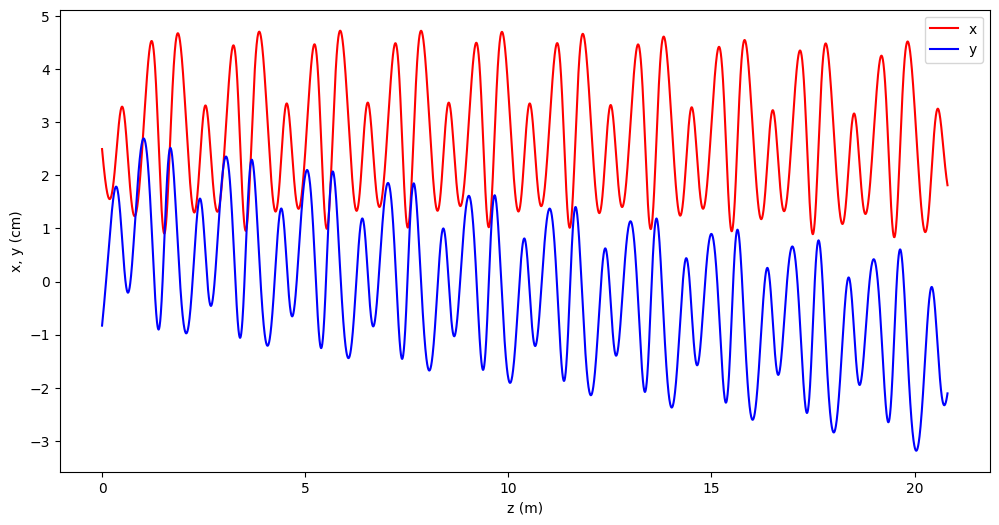

In [45]:
# Plot x, y along z:
plt.figure(figsize = (12,6))
plt.plot(z_vals,x_vals,color='red',label='x')
plt.plot(z_vals,y_vals,color='blue',label='y')
plt.xlabel('z (m)')
plt.ylabel('x, y (cm)')
plt.legend()
plt.show()

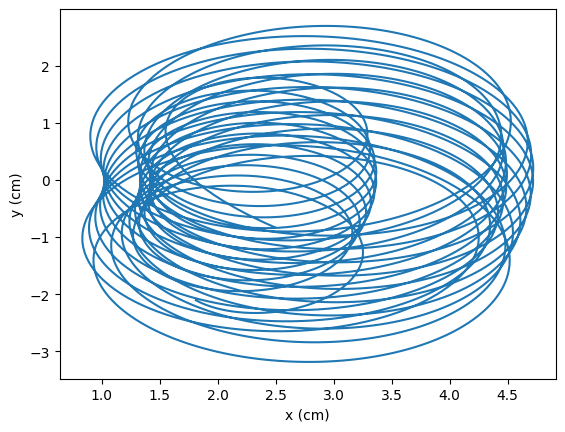

In [46]:
# Plot projection in x-y plane:
plt.figure()
plt.plot(x_vals,y_vals)
plt.xlabel('x (cm)')
plt.ylabel('y (cm)')
plt.show()

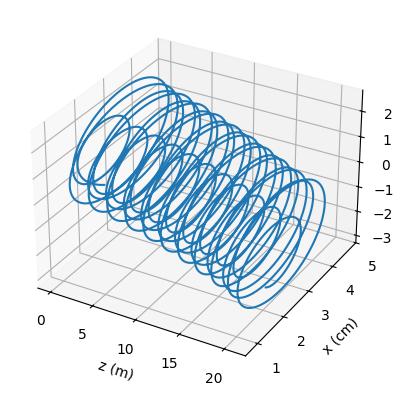

In [47]:
# 3D plot of trajectory:
# %matplotlib widget
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.plot(z_vals,x_vals,y_vals)
ax.set_xlabel('z (m)')
ax.set_ylabel('x (cm)')
ax.set_zlabel('y (cm)')
plt.show()

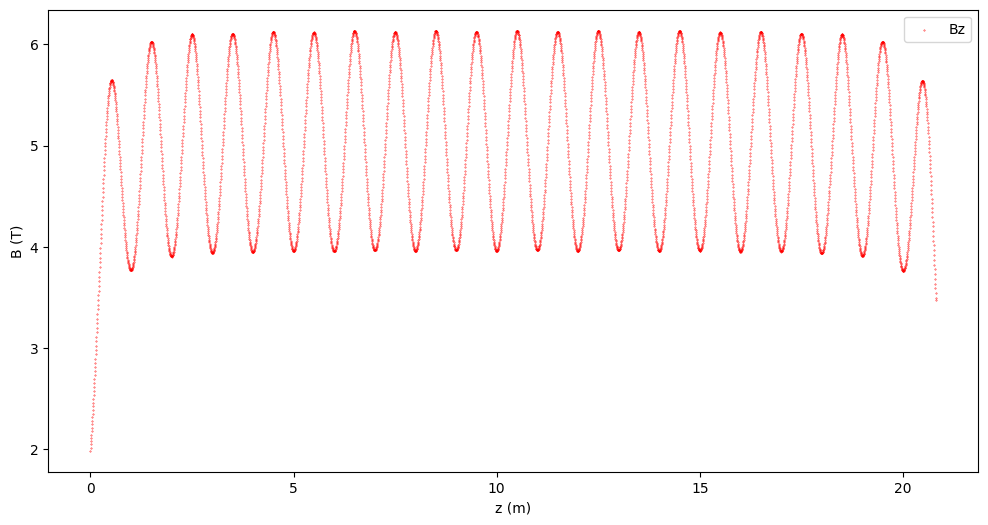

In [48]:
# Plot magnetic field along z:
plt.figure(figsize = (12,6))
# plt.plot(z_vals,Bx_vals,color='green',label='200*Bx')
# plt.plot(z_vals,By_vals,color='blue',label='200*By')
# plt.plot(z_vals,Bz_vals,color='red',label='Bz')
plt.scatter(z_vals,Bz_vals,color='red',label='Bz',s=0.1)
plt.xlabel('z (m)')
plt.ylabel('B (T)')
plt.legend()
plt.show()